# BULLET DROP SIMULATOR

AI in Games assignment 02

In [1]:
from matplotlib import pyplot as plt
import numpy as np

gravity = 9.80665
air_den = 1.2

# Bullet templates
five56 = {
    'drag_coef':0.388,
    'cross_sec':0.000025419304,
    'mass' : 0.0123
}

three08 = {
    'drag_coef':0.295,
    'cross_sec':4.8e-05,
    'mass' : 0.016
}

## Formula Used

#### y-component initial velocity:<br>
$v_y = v \sin(\theta)$
___

#### y-component displacement formula:
$y = v_{0y}t-0.5gt^2$
___
#### x-component initial velocity:
$v_x = v \cos(\theta)$
___
#### x drag force:
$F_{drag} = \frac{-C\rho Av^2}{2}$
___
#### x drag deceleration:
$a = \frac{F_{drag}}{m}$<br><br>
$a = \frac{-C\rho Av^2}{2m}$
___
#### x-speed formula with drag/deceleration
$v_{tx} = v_{0x} + at$
___
#### x-distance:<br>
$x = v_xt$<br>
___

## Function Initialization

In [2]:
def calculate_init_velocity_y(velocity, angle):
    vy = velocity * np.sin((np.deg2rad(angle)))
    return vy


def calculate_init_velocity_x(velocity, angle):
    vx = velocity * np.cos((np.deg2rad(angle)))
    return vx


def calculate_displacement_y(velo, time):
    y = velo * time - 0.5 * gravity * (time ** 2)
    return y


# DEPRECATED
# def calculate_distance_x(velo, time, bltinf):
#     x = (velo * time)
#     drag_offset = (bltinf['drag_coef'] * air_den * bltinf['cross_sec'] * 
#           (velo**2) * (time**2)) / (2 * bltinf['mass'])
#     print(x, drag_offset)
#     return x - drag_offset


# DEPRECATED
# def calculate_velocity_x_drag(velo, time, bltinf):
#     vxt = 2 * bltinf['mass'] / (air_den) * bltinf['cross_sec'] * bltinf['drag_coef'] * time + 2 * bltinf['mass'] * (velo**-1)
#     return vxt


def calculate_velocity_x_dragged(velo, time, bltinf):
    a = -(bltinf['drag_coef'] * air_den * bltinf['cross_sec'] * (velo**2)) / 2 * bltinf['mass']
    vt = velo + a * time
    return vt


def calculate_distance_x(velo, time):
    return velo * time

## Main Operation

In [3]:
# initialize initial velocity, angle, and height
vy = calculate_init_velocity_y(400.0, 1.0)
vx = calculate_init_velocity_x(400.0, 1.0)
print('vx: ', vx)
print('vy: ', vy)
initial_h = 1

# initialize list to hold values for plot later
y_coordinates = []
x_coordinates = []
horizontal_spd = []
timeframe = []

# holds the final distance where the bullet meets ground
x_touchdown = 0

# calculation
x = 0.0
time = 0.0
while(True):
    y = 1 + calculate_displacement_y(vy, time)
    vx = calculate_velocity_x_dragged(vx, time, three08)
    x = x + calculate_distance_x(vx, 0.001)
    
    # stops the operation when bullet hits the ground level
    if y <= 0.0:
        x_touchdown = x
        break
    
    x_coordinates.append(x)
    y_coordinates.append(y)
    horizontal_spd.append(vx)
    timeframe.append(time)
    
    time = time + 0.001
    

    
print('Bullet touched the ground on {}s at {}m away'.format(time, x_touchdown))
print('Final horizontal velocity is {}m/s'.format(vx))

vx:  399.9390780625565
vy:  6.980962574913405
Bullet touched the ground on 1.5549999999999395s at 609.1675734176108m away
Final horizontal velocity is 375.25652211951586m/s


## Data Plotting

Bullet travel


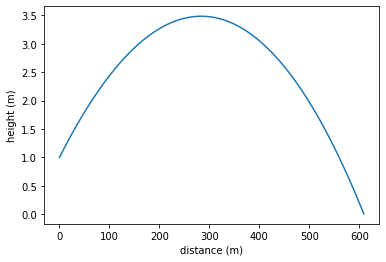

Bullet height


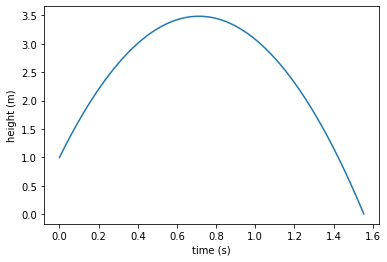

Bullet distance


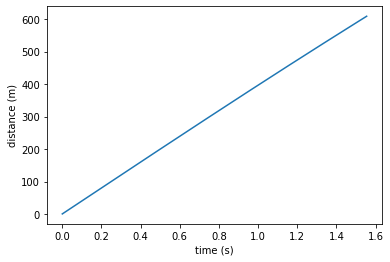

Bullet speed


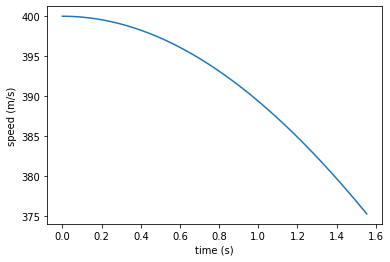

In [4]:
plt.plot(x_coordinates, y_coordinates)
plt.xlabel('distance (m)')
plt.ylabel('height (m)')

print('Bullet travel')
plt.show()

plt.plot(timeframe, y_coordinates)
plt.xlabel('time (s)')
plt.ylabel('height (m)')

print('Bullet height')
plt.show()

plt.plot(timeframe, x_coordinates)
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

print('Bullet distance')
plt.show()

plt.plot(timeframe, horizontal_spd)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')

print('Bullet speed')
plt.show()